 # Amazon Prime User Analysis 

### Importing the libraries

In [1]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

### Loading the Dataset

In [2]:
dataset = pd.read_csv('data/amazon_prime_users.csv')

### First look at the data

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   User ID                        2500 non-null   int64  
 1   Name                           2500 non-null   object 
 2   Email Address                  2500 non-null   object 
 3   Username                       2500 non-null   object 
 4   Date of Birth                  2500 non-null   object 
 5   Gender                         2500 non-null   object 
 6   Location                       2500 non-null   object 
 7   Membership Start Date          2500 non-null   object 
 8   Membership End Date            2500 non-null   object 
 9   Subscription Plan              2500 non-null   object 
 10  Payment Information            2500 non-null   object 
 11  Renewal Status                 2500 non-null   object 
 12  Usage Frequency                2500 non-null   o

In [4]:
dataset.head()

,User ID,Name,Email Address,Username,Date of Birth,Gender,Location,Membership Start Date,Membership End Date,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions
0,1,Ronald Murphy,williamholland@example.com,williamholland,1953-06-03,Male,Rebeccachester,2024-01-15,2025-01-14,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV,Medium,3.6,3
1,2,Scott Allen,scott22@example.org,scott22,1978-07-08,Male,Mcphersonview,2024-01-07,2025-01-06,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone,Medium,3.8,7
2,3,Jonathan Parrish,brooke16@example.org,brooke16,1994-12-06,Female,Youngfort,2024-04-13,2025-04-13,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV,Low,3.3,8
3,4,Megan Williams,elizabeth31@example.net,elizabeth31,1964-12-22,Female,Feliciashire,2024-01-24,2025-01-23,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,Smart TV,High,3.3,7
4,5,Kathryn Brown,pattersonalexandra@example.org,pattersonalexandra,1961-06-04,Male,Port Deborah,2024-02-14,2025-02-13,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Smart TV,Low,4.3,1


---
### Data Preprocessing

In [5]:
# Convert column names to lowercase and replace spaces with underscores
dataset.columns = dataset.columns.str.lower().str.replace(' ', '_')

In [6]:
# formatting the dates in actual datetime format

dataset['date_of_birth'] = pd.to_datetime(dataset['date_of_birth'])
dataset['membership_start_date'] = pd.to_datetime(dataset['membership_start_date'])
dataset['membership_end_date'] = pd.to_datetime(dataset['membership_end_date'])

In [7]:
# calculate the age with the given birthdate
current_year = datetime.now().year
dataset['age'] = current_year - dataset['date_of_birth'].dt.year

---
## User with a higher usage frequency are younger

Text(0, 0.5, 'Count')

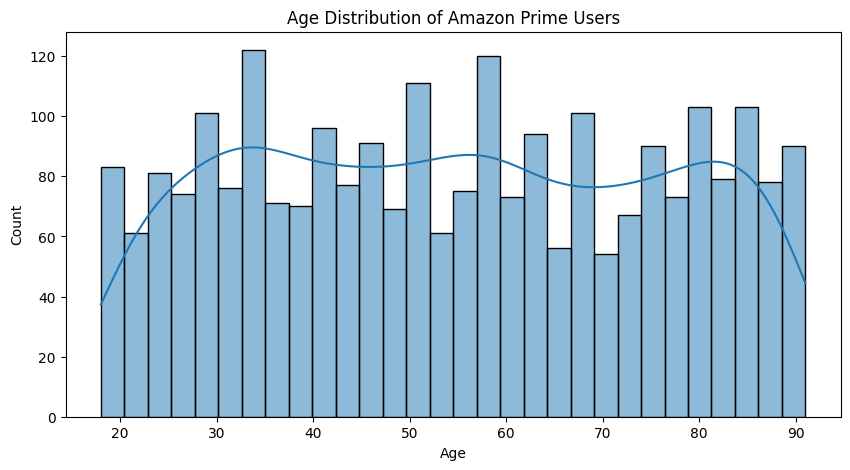

In [8]:
plt.figure(figsize = (10, 5))
sns.histplot(dataset['age'], bins = 30, kde=True)
plt.title('Age Distribution of Amazon Prime Users')
plt.xlabel('Age')
plt.ylabel('Count')

In [9]:
pd.set_option('display.max_rows', None)
age_counts = dataset['age'].value_counts().sort_index()
print(age_counts)

age
18     9
19    29
20    45
21    26
22    35
23    21
24    24
25    36
26    34
27    40
28    30
29    33
30    38
31    32
32    44
33    43
34    41
35    38
36    36
37    35
38    39
39    31
40    31
41    28
42    37
43    41
44    36
45    36
46    27
47    28
48    40
49    29
50    36
51    45
52    30
53    28
54    33
55    43
56    32
57    46
58    35
59    39
60    39
61    34
62    30
63    34
64    30
65    26
66    30
67    34
68    34
69    33
70    21
71    33
72    36
73    31
74    29
75    35
76    26
77    36
78    37
79    35
80    33
81    35
82    34
83    45
84    38
85    35
86    30
87    38
88    40
89    39
90    24
91    27
Name: count, dtype: int64


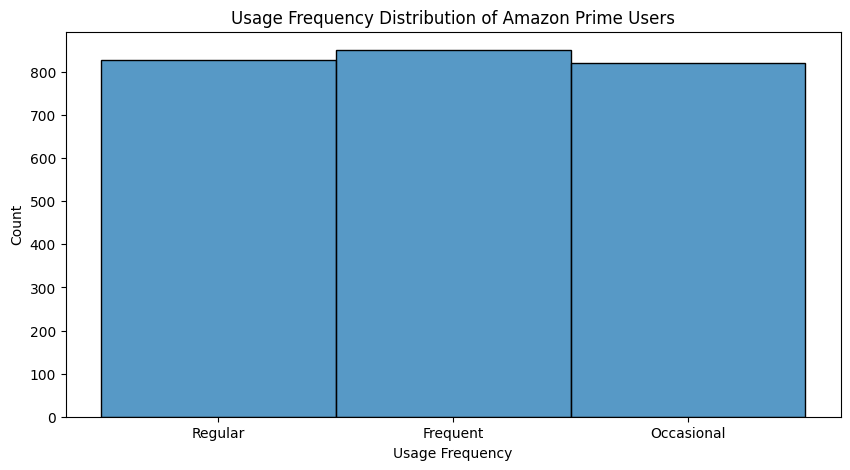

In [10]:
plt.figure(figsize = (10, 5))
sns.histplot(dataset['usage_frequency'])
plt.title('Usage Frequency Distribution of Amazon Prime Users')
plt.xlabel('Usage Frequency')
plt.ylabel('Count')
plt.show()

In [11]:
dataset.usage_frequency.value_counts()

usage_frequency
Frequent      851
Regular       827
Occasional    822
Name: count, dtype: int64

In [12]:
age_bins = [18, 35, 55, 75, float('inf')]


bin_labels = ['Young Adults', 'Middle Age', 'Grown Adults', 'Seniors']


dataset['age_bin'] = pd.cut(dataset['age'], bins=age_bins, labels=bin_labels, right=False)


dataset.age_bin.value_counts()

age_bin
Middle Age      684
Grown Adults    669
Seniors         587
Young Adults    560
Name: count, dtype: int64

In [13]:
table = pd.pivot_table(dataset, index = 'age_bin', columns = 'usage_frequency', aggfunc = 'size')
table 

C:\Users\angRy\AppData\Local\Temp\ipykernel_4740\4257979786.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  table = pd.pivot_table(dataset, index = 'age_bin', columns = 'usage_frequency', aggfunc = 'size')


usage_frequency,Frequent,Occasional,Regular
age_bin,,,
Young Adults,189,184,187
Middle Age,239,228,217
Grown Adults,227,226,216
Seniors,196,184,207


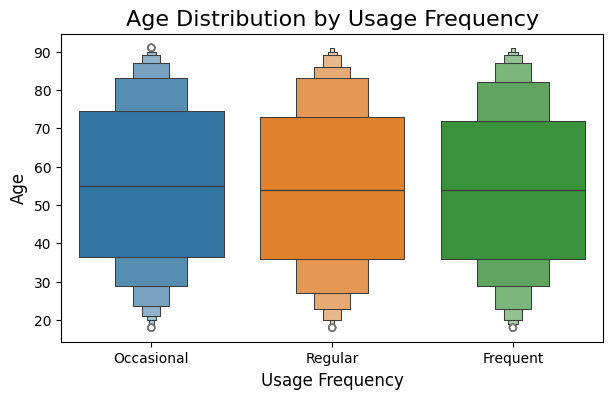

In [14]:
fig = plt.figure(figsize=(7, 4))
sns.boxenplot(data = dataset, x = 'usage_frequency', y = 'age', hue = 'usage_frequency', legend = False)
plt.xticks(ticks=[0, 1, 2], labels=['Occasional', 'Regular', 'Frequent'])
plt.xlabel('Usage Frequency', fontsize = 12)
plt.ylabel('Age', fontsize = 12)
plt.title('Age Distribution by Usage Frequency', fontsize = 16)
plt.show()


Occasional shows us data from the age of 18 to 91 with a median of 54 years old <br>
Regular shows us data from the age of 18 to 91 with a median of 55 years old <br>
Frequent shows us data from the age of 18 to 91 with a median of 54 years old <br>

#### Conclusion: 
The examination of age demographics within each usage frequency category showcases consistency in the age range and median age across all groups. <br>
Notably, the median ages for users in the occasional, regular, and frequent usage categories are relatively similar, with only marginal differences observed. <br>
The analysis underscores the nuanced relationship between usage frequency and user age, revealing a more balanced distribution than anticipated. <br>
This finding prompts a reevaluation of assumptions regarding user engagement patterns and underscores the need for a comprehensive understanding of user demographics to inform targeted strategies for user engagement and platform optimization.

---

## Frequent users are more likely to engage <br>

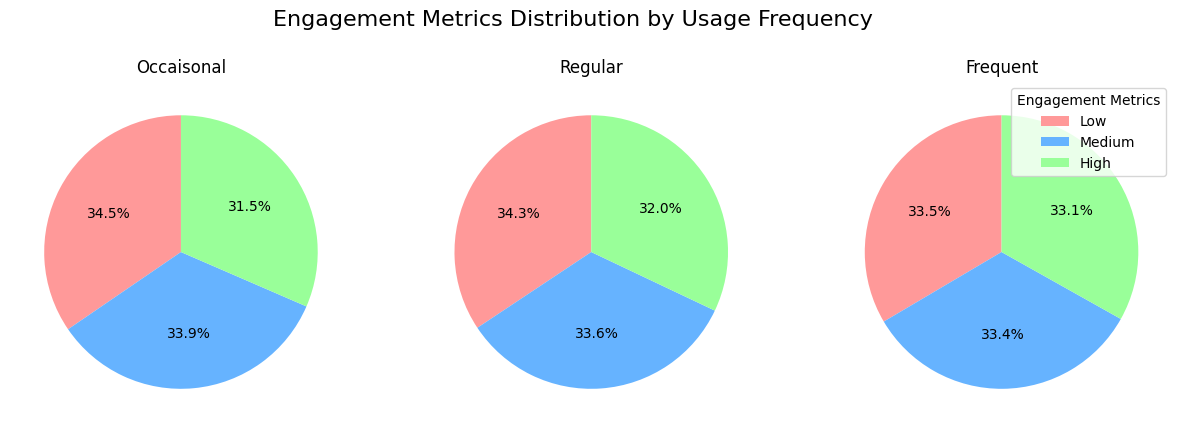

In [15]:
frequency_mapping = {
    'Occasional' : 1,
    'Regular' : 2,
    'Frequent' : 3,
}

dataset['usage_frequency_category'] = dataset['usage_frequency'].map(frequency_mapping)

engagement_order = ['Low', 'Medium', 'High']
dataset['engagement_metrics'] = pd.Categorical(dataset['engagement_metrics'], categories = engagement_order, ordered = True)

c1 = dataset[dataset['usage_frequency_category'] == 1]
c2 = dataset[dataset['usage_frequency_category'] == 2]
c3 = dataset[dataset['usage_frequency_category'] == 3]


c1_distribution = c1['engagement_metrics'].value_counts(normalize = True) * 100
c2_distribution = c2['engagement_metrics'].value_counts(normalize = True) * 100
c3_distribution = c3['engagement_metrics'].value_counts(normalize = True) * 100


colors = ['#ff9999', '#66b3ff', '#99ff99']
labels = 'Low', 'Medium', 'High' 
fig, axs = plt.subplots(1, 3, figsize = (15, 5))

axs[0].pie(c1_distribution, labels = None, autopct = '%1.1f%%', startangle = 90, colors = colors)
axs[0].set_title('Occaisonal')

axs[1].pie(c2_distribution, labels = None, autopct = '%1.1f%%', startangle = 90, colors = colors)
axs[1].set_title('Regular')

axs[2].pie(c3_distribution, labels = None, autopct = '%1.1f%%', startangle = 90, colors = colors)
axs[2].set_title('Frequent')
axs[2].legend(labels, title = 'Engagement Metrics', loc = 'upper right')

fig.suptitle('Engagement Metrics Distribution by Usage Frequency', fontsize = 16)
plt.show()

In [16]:
dataset.engagement_metrics.value_counts()

engagement_metrics
High      845
Medium    834
Low       821
Name: count, dtype: int64

### Conclusion:

Frequent users exhibit the highest engagement metric percentage, with a marginal lead of 1.1% over regular users and 1.6% over occasional users. <br>

This finding underscores the notion that users who engage with the platform more frequently are indeed more likely to demonstrate heightened levels of interaction and participation. <br>
These findings serve as a valuable guide for optimizing platform features and content to maximize engagement and enhance user satisfaction across all usage frequencies.

---

## Younger users have different favorites genres

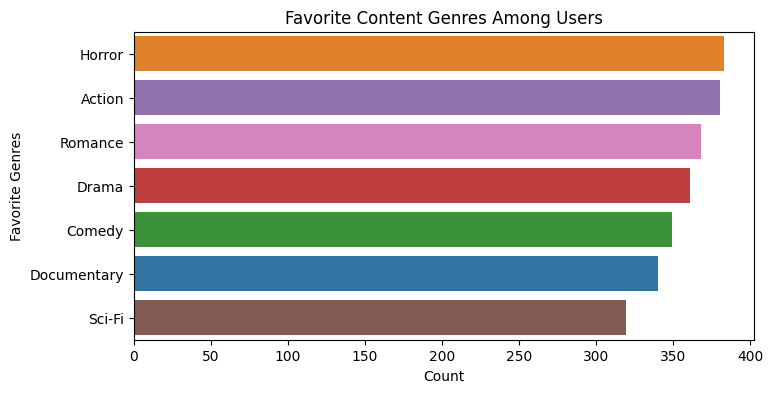

In [17]:
plt.figure(figsize = (8, 4))
sns.countplot(y = 'favorite_genres', data = dataset, order = dataset['favorite_genres'].value_counts().index, hue = 'favorite_genres')
plt.title('Favorite Content Genres Among Users')
plt.xlabel('Count')
plt.ylabel('Favorite Genres')
plt.show()

In [18]:
dataset['favorite_genres'].value_counts()

favorite_genres
Horror         383
Action         380
Romance        368
Drama          361
Comedy         349
Documentary    340
Sci-Fi         319
Name: count, dtype: int64

In [19]:
dataset['age'].describe()

count    2500.000000
mean       54.729200
std        21.045841
min        18.000000
25%        36.000000
50%        55.000000
75%        73.000000
max        91.000000
Name: age, dtype: float64

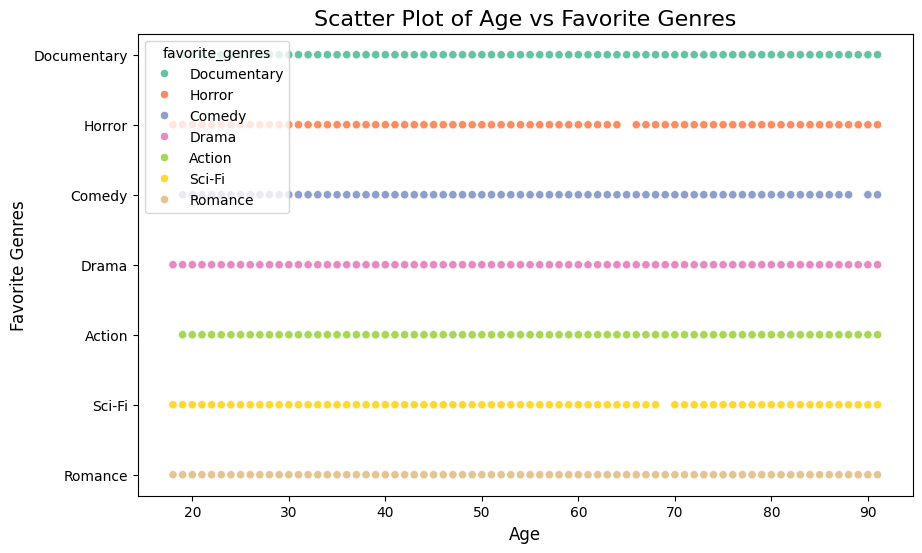

In [20]:
plt.figure(figsize = (10, 6))
sns.scatterplot(data = dataset, x = 'age', y = 'favorite_genres', hue = 'favorite_genres', palette = 'Set2')
plt.title('Scatter Plot of Age vs Favorite Genres', fontsize = 16)
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Favorite Genres', fontsize = 12)
plt.show()

In [21]:
def age_group(x):
    if x < 34:
        return 'Young Adults'
    elif x < 54:
        return 'Middle Age'
    elif x < 74:
        return 'Eldery Adults'
    else:
        return 'Seniors'

dataset['age_group'] = dataset['age'].apply(age_group)

dataset['age_group'].value_counts()

age_group
Middle Age       692
Eldery Adults    673
Seniors          616
Young Adults     519
Name: count, dtype: int64

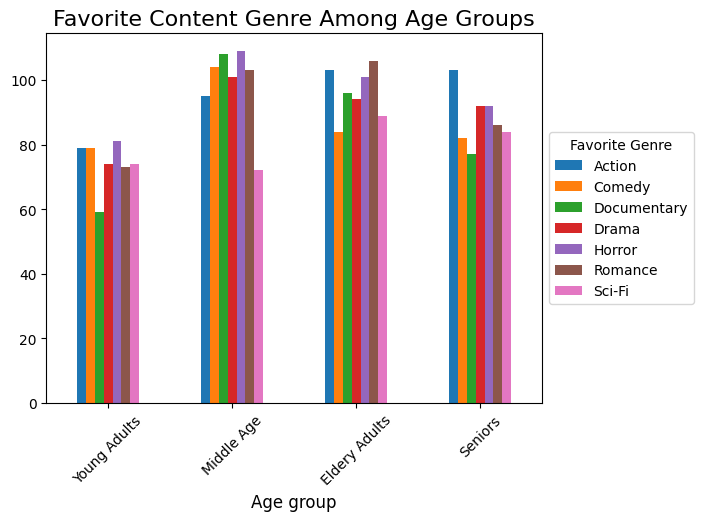

In [22]:
data_grouped = dataset.groupby(['age_group', 'favorite_genres']).size().unstack(fill_value = 0)
data_grouped = data_grouped.reindex(['Young Adults', 'Middle Age', 'Eldery Adults', 'Seniors' ])

data_grouped.plot(kind = 'bar')
plt.title('Favorite Content Genre Among Age Groups', fontsize = 16)
plt.xlabel('Age group', fontsize = 12)
plt.xticks(rotation = 45)
plt.legend(title = 'Favorite Genre', loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

In [25]:
table6 = pd.pivot_table(dataset, index = 'favorite_genres', columns = 'age_group', aggfunc = 'size')
table6

age_group,Eldery Adults,Middle Age,Seniors,Young Adults
favorite_genres,,,,
Action,103,95,103,79
Comedy,84,104,82,79
Documentary,96,108,77,59
Drama,94,101,92,74
Horror,101,109,92,81
Romance,106,103,86,73
Sci-Fi,89,72,84,74


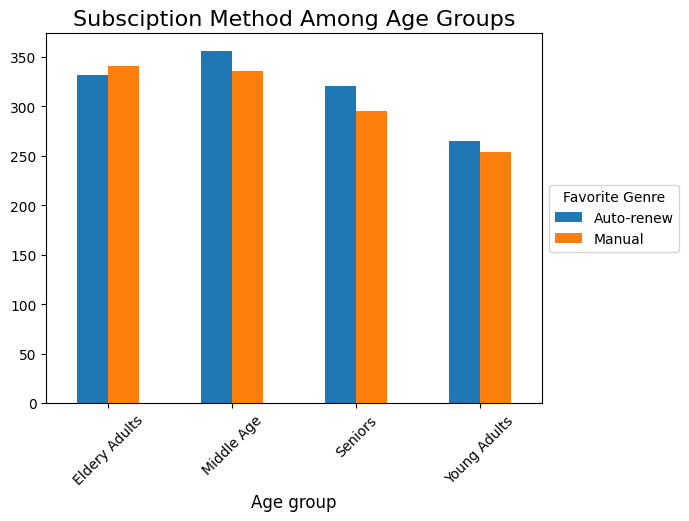

In [ ]:
data_grouped2 = dataset.groupby(['age_group', 'renewal_status']).size().unstack(fill_value = 0)

data_grouped2.plot(kind = 'bar')
plt.title('Subsciption Method Among Age Groups', fontsize = 16)
plt.xlabel('Age group', fontsize = 12)
plt.xticks(rotation = 45)
plt.legend(title = 'Favorite Genre', loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

In [ ]:
table5 = pd.pivot_table(dataset, index = 'renewal_status', columns = 'age_group', aggfunc = 'size')
table5

age_group,Eldery Adults,Middle Age,Seniors,Young Adults
renewal_status,,,,
Auto-renew,332,356,321,265
Manual,341,336,295,254


In [ ]:
table = pd.pivot_table(dataset, index = 'favorite_genres', columns = 'age_group', aggfunc = 'size')
table 

age_group,Eldery Adults,Middle Age,Seniors,Young Adults
favorite_genres,,,,
Action,103,95,103,79
Comedy,84,104,82,79
Documentary,96,108,77,59
Drama,94,101,92,74
Horror,101,109,92,81
Romance,106,103,86,73
Sci-Fi,89,72,84,74


### Conclusion:

Top 3 for Under 25: Horror, Drama, Documentary <br>
Top 3 for Under 60: Action, Comedy, Horror/Romance <br>
Top 3 for Over 60: Action, Horror, Drama <br>

Analysis underscores the dynamic nature of user preferences across different age groups. <br> 
While younger users gravitate towards genres that offer intense emotional and intellectual engagement, older demographics exhibit a preference for narratives that evoke strong emotional responses and captivate the imagination. <br>
Understanding these nuanced preferences is crucial for content creators and platforms seeking to tailor their offerings to diverse audience segments effectively.

---

## Frequent user are more likely to use diverse devices

<Axes: xlabel='devices_used', ylabel='count'>

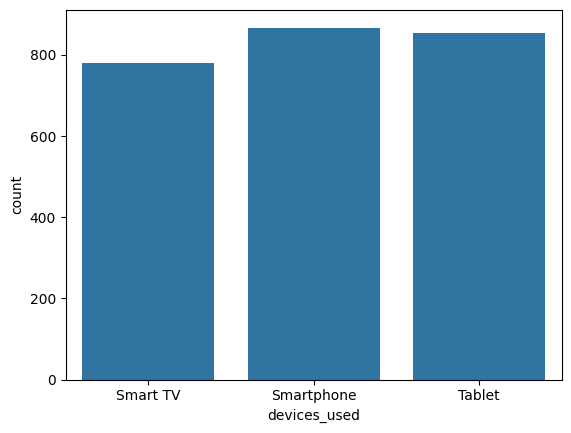

In [ ]:
sns.countplot(dataset, x = 'devices_used')

In [ ]:
dataset.devices_used.value_counts()

devices_used
Smartphone    867
Tablet        853
Smart TV      780
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

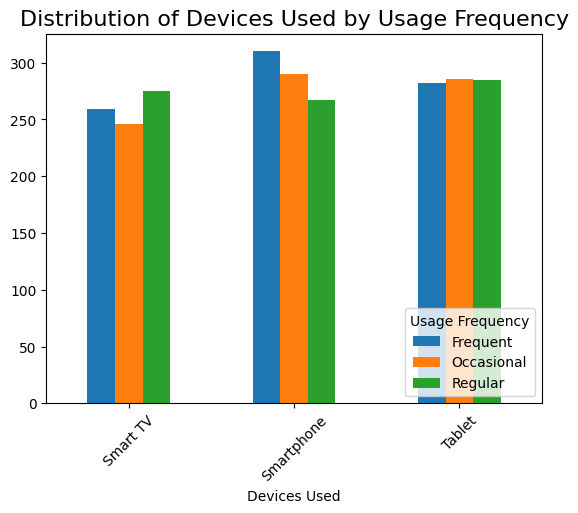

In [ ]:
plt.figure(figsize = (10, 6))
data_grouped = dataset.groupby(['devices_used','usage_frequency'])['devices_used'].count().unstack()
data_grouped.plot(kind = 'bar')
plt.title('Distribution of Devices Used by Usage Frequency', fontsize = 16) 
plt.xlabel('Devices Used')
plt.xticks(rotation =  45) 
plt.legend(title = 'Usage Frequency',loc = 'lower right')
plt.show()

In [ ]:
table2 = pd.pivot_table(dataset, index = 'usage_frequency', columns = 'devices_used', aggfunc = 'size', fill_value = 0)
table2

devices_used,Smart TV,Smartphone,Tablet
usage_frequency,,,
Frequent,259,310,282
Occasional,246,290,286
Regular,275,267,285


### Conclusion:

Occasional and regular users exhibit a more uniform distribution of device usage, with marginal differences observed across device categories. <br>
While these user segments also engage with the platform across multiple devices, their usage patterns appear to be less diversified compared to frequent users.

---

 ## The Customer support interactions impacts the feedback rating

<Axes: xlabel='feedback/ratings', ylabel='count'>

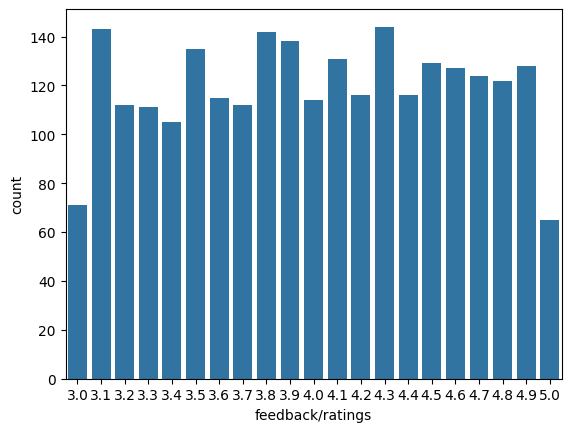

In [ ]:
sns.countplot(dataset, x = 'feedback/ratings')

In [ ]:
dataset['feedback/ratings'].value_counts()

feedback/ratings
4.3    144
3.1    143
3.8    142
3.9    138
3.5    135
4.1    131
4.5    129
4.9    128
4.6    127
4.7    124
4.8    122
4.4    116
4.2    116
3.6    115
4.0    114
3.2    112
3.7    112
3.3    111
3.4    105
3.0     71
5.0     65
Name: count, dtype: int64

<Axes: xlabel='customer_support_interactions', ylabel='count'>

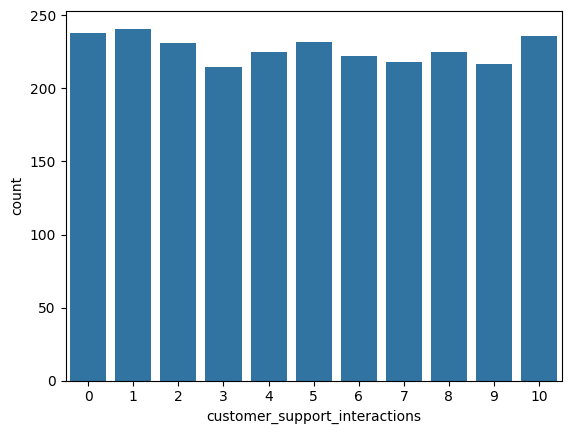

In [ ]:
sns.countplot(dataset, x = 'customer_support_interactions')

In [ ]:
dataset.customer_support_interactions.value_counts()

customer_support_interactions
1     241
0     238
10    236
5     232
2     231
8     225
4     225
6     222
7     218
9     217
3     215
Name: count, dtype: int64

In [ ]:
dataset['feedback/ratings'].value_counts()

feedback/ratings
4.3    144
3.1    143
3.8    142
3.9    138
3.5    135
4.1    131
4.5    129
4.9    128
4.6    127
4.7    124
4.8    122
4.4    116
4.2    116
3.6    115
4.0    114
3.2    112
3.7    112
3.3    111
3.4    105
3.0     71
5.0     65
Name: count, dtype: int64

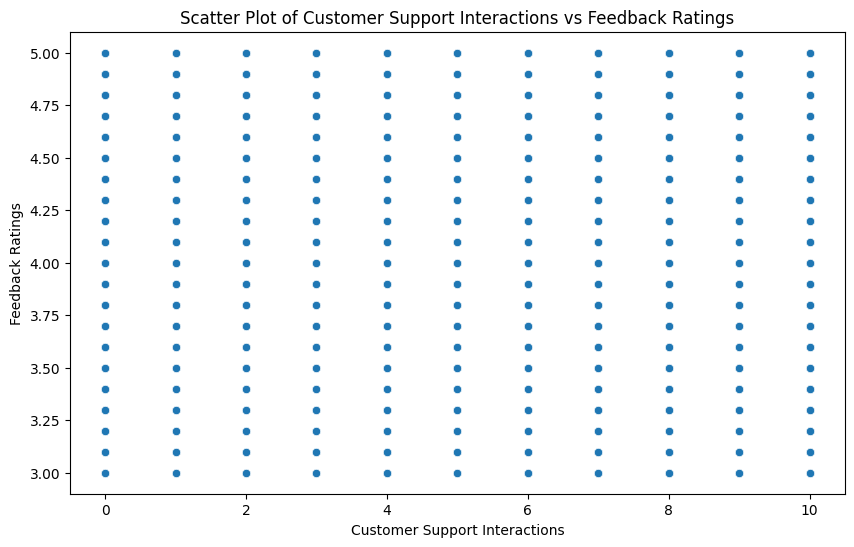

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(dataset, x = 'customer_support_interactions', y = 'feedback/ratings')
plt.title('Scatter Plot of Customer Support Interactions vs Feedback Ratings')
plt.xlabel('Customer Support Interactions')
plt.ylabel('Feedback Ratings')
plt.show()

In [ ]:
import pandas as pd

import pandas as pd

def categorize_rating(rating):
    if 3.0 <= rating <= 3.4:
        return '3.0-3.4'
    elif 3.5 <= rating <= 3.9:
        return '3.5-3.9'
    elif 4.0 <= rating <= 4.4:
        return '4.0-4.4'
    elif 4.5 <= rating <= 4.9:
        return '4.5-4.9'
    elif rating == 5.0:
        return '5.0'
    else:
        return 'Other'

# Assuming dataset is your DataFrame
dataset['rating_category'] = dataset['feedback/ratings'].apply(categorize_rating)

table3 = pd.pivot_table(dataset, index='customer_support_interactions', columns='rating_category', aggfunc='size', fill_value=0)
print(table3)


rating_category                3.0-3.4  3.5-3.9  4.0-4.4  4.5-4.9  5.0
customer_support_interactions                                         
0                                   64       53       58       54    9
1                                   51       67       54       62    7
2                                   55       54       62       53    7
3                                   41       67       52       48    7
4                                   48       53       64       54    6
5                                   32       62       66       68    4
6                                   45       56       54       61    6
7                                   48       65       45       54    6
8                                   60       59       51       51    4
9                                   48       55       51       60    3
10                                  50       51       64       65    6


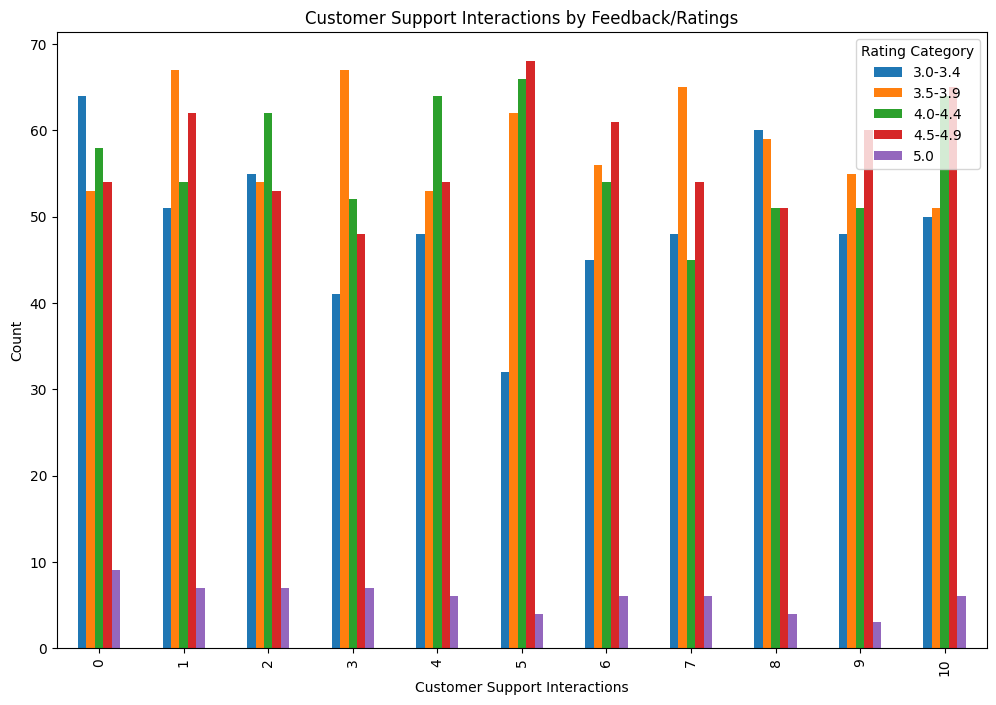

In [ ]:
table3.plot(kind='bar', figsize=(12, 8))

plt.title('Customer Support Interactions by Feedback/Ratings')
plt.xlabel('Customer Support Interactions')
plt.ylabel('Count')
plt.legend(title='Rating Category')

plt.show()

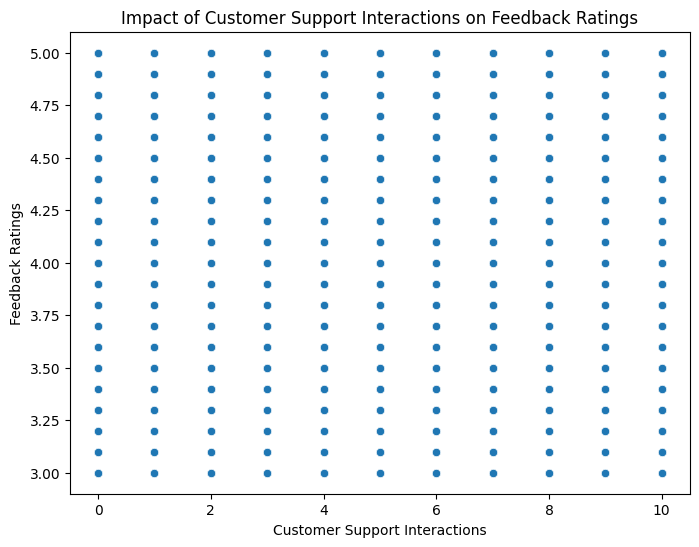

In [ ]:
plt.figure(figsize = (8, 6))
sns.scatterplot(dataset, x = 'customer_support_interactions', y = 'feedback/ratings')

plt.xlabel('Customer Support Interactions')
plt.ylabel('Feedback Ratings')
plt.title('Impact of Customer Support Interactions on Feedback Ratings')

plt.show()

### Conclusion:


This observation suggests the critical role of customer support in shaping user experiences and perceptions. <br>
A positive and effective support experience tends to correlate with higher feedback ratings, indicating user satisfaction and confidence in the platform's services. <br>
Conversely, a negative or inadequate support experience may lead to lower feedback ratings, signaling dissatisfaction and potential issues requiring attention. <br>


--- 

 ## Electronics are the most sold category

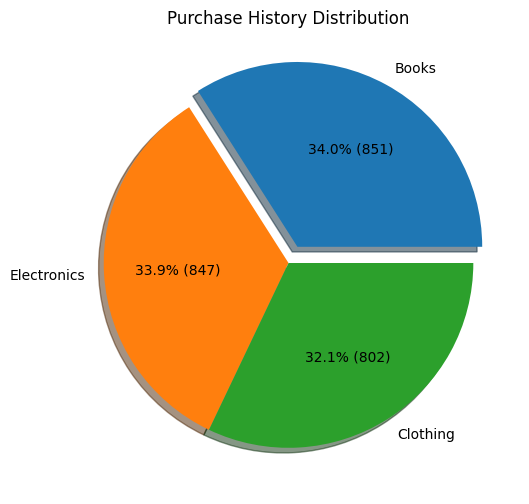

In [ ]:
purchase_history_counts = dataset['purchase_history'].value_counts()

explode = (0.1, 0, 0)

plt.figure(figsize = (6, 6))
plt.pie(purchase_history_counts, labels = purchase_history_counts.index, autopct = lambda p: '{:.1f}% ({:d})'.format(p, int(p * sum(purchase_history_counts) / 100)), explode = explode, shadow = True)
plt.title('Purchase History Distribution')

plt.show()

### Conclusion:

Contrary to the initial assumption, the findings reveal a finely balanced distribution among the top three categories: books, electronics, and clothing. <br>
The marginal differences in sales proportions among the top categories suggest a dynamic marketplace where multiple product segments vie for consumer attention and expenditure. <br>
By recognizing the competitive landscape among categories, businesses can adapt their strategies to effectively meet evolving consumer demands and capitalize on emerging market opportunities. <br>

---

## Mastercard is the most used payment method

In [ ]:
dataset.payment_information.value_counts()

payment_information
Mastercard    856
Visa          838
Amex          806
Name: count, dtype: int64

<Axes: xlabel='payment_information', ylabel='Count'>

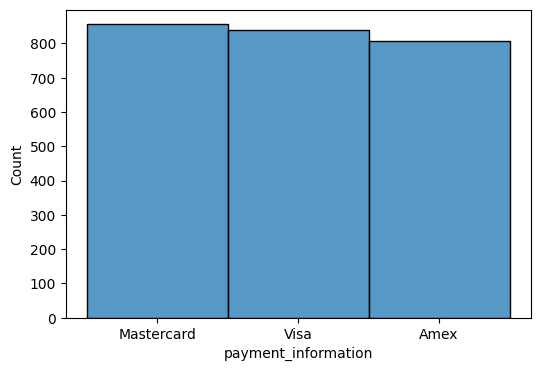

In [ ]:
plt.figure(figsize = (6, 4))
sns.histplot(dataset , x = 'payment_information')

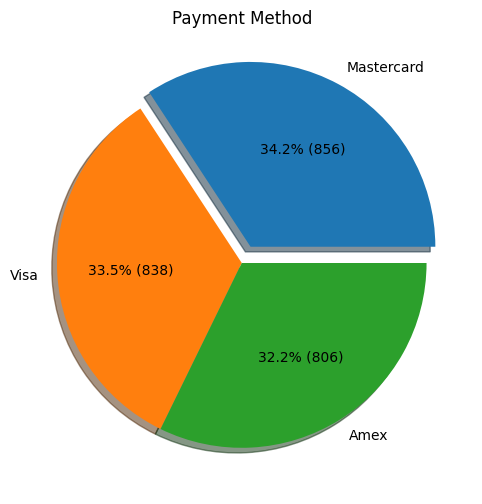

In [ ]:
payment_counts = dataset['payment_information'].value_counts()

explode = (0.1, 0, 0)  

plt.figure(figsize = (6, 6))
plt.pie(payment_counts, labels = payment_counts.index, autopct = lambda p: '{:.1f}% ({:d})'.format(p, int(p * sum(payment_counts) / 100)), explode = explode, shadow = True)
plt.title('Payment Method')

plt.show()

In [ ]:
table4 = pd.pivot_table(dataset, index = 'payment_information', columns = 'renewal_status', aggfunc = 'size')
table4

renewal_status,Auto-renew,Manual
payment_information,,
Amex,385,421
Mastercard,441,415
Visa,448,390


### Conclusion:

While Mastercard holds a significant share, its lead over Visa and Amex is marginal, indicating a competitive marketplace where multiple payment options vie for user preference. <br>
This distribution among the top payment methods underscores the diverse preferences and adoption rates among users. <br>

---


## Most users are using the annual renewal subscription

([<matplotlib.patches.Wedge at 0x1ed813bcb60>,
 [Text(-0.03618559969391218, 1.199454293574704, 'Auto-renew'),
  Text(0.03317003011015458, -1.0994997722157525, 'Manual')],
 [Text(-0.021108266488115434, 0.6996816712519106, '51.0% (1273)'),
  Text(0.018092743696447953, -0.5997271484813195, '49.0% (1225)')])

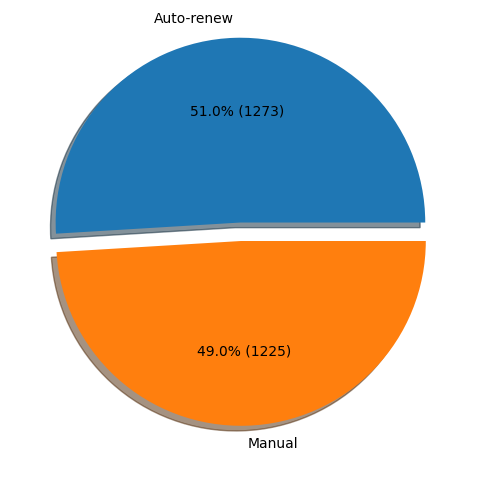

In [ ]:
renewal_counts = dataset['renewal_status'].value_counts()

explode = (0.1, 0)

plt.figure(figsize = (8, 6))
plt.pie(renewal_counts, labels = renewal_counts.index, autopct = lambda p: '{:.1f}% ({:d})'.format(p, int(p * sum(renewal_counts) / 100)), explode = explode, shadow = True)

### Conclusion:

While auto-renew slightly edges out manual renewal in terms of percentage, the difference is marginal, suggesting a competitive landscape between the two methods. <br>
Users exhibit varying preferences based on factors such as convenience, flexibility, and perceived control over subscription management.

---